# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Santiago Gaviria Zapata
#### Segundo Integrante: Jorge Hiler Ricardo


In [0]:
!pip3 install git+https://github.com/sevamoo/SOMPY.git

  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-v7ymfiqo
  Running command git clone -q https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-v7ymfiqo
  Created wheel for SOMPY: filename=SOMPY-1.1-cp36-none-any.whl size=28117 sha256=86ca792f9c10a006ed027a25087da750bd3d876a5748a767ef1ab65629daa2eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-g9g6spp3/wheels/97/7f/e9/77eaac4e79f64a701e9788d91ba334f6c7f38f96a2c6eb8261
Successfully built SOMPY


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/SOMPY-1.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [0]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")


## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables.

1. La base de datos iris 
2. La base de datos de dígitos escritos. 

Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que **no usaremos las etiquetas** e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [0]:
from sklearn.datasets import load_iris
from numpy import random
import sompy
import sys
sys.path.insert(0, '../../library/')
from sklearn.preprocessing import StandardScaler
import showsompy as sm


data = load_iris()
X_iris = data.data
#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["yellow"] * 50)
colors.extend(["blue"] * 50)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

In [0]:
#Normalizar
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X_iris)
n_columns = 50
n_rows =50

Para el trabajo usaremos el paquete SOMPY, use la siguiente instrucción

```
!pip3 install git+https://github.com/sevamoo/SOMPY.git
```
La documentación se pueden consultar en : https://github.com/sevamoo/SOMPY. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 50 por 50 y un número de épocas igual a 100. 

In [0]:
mapsize = [n_columns,n_rows]
component_names = ['sepal length','sepal width', 'petal length','petal width']
som_iris = sompy.SOMFactory.build(Xn, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
som_iris.train(n_job=1, verbose='info', maxtrainlen=100) 

 Training...
 pca_linear_initialization took: 0.044000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.339000, quantization error: 0.465204

 epoch: 2 ---> elapsed time:  0.326000, quantization error: 0.409582

 epoch: 3 ---> elapsed time:  0.307000, quantization error: 0.368708

 epoch: 4 ---> elapsed time:  0.308000, quantization error: 0.356570

 epoch: 5 ---> elapsed time:  0.311000, quantization error: 0.351745

 epoch: 6 ---> elapsed time:  0.310000, quantization error: 0.347000

 epoch: 7 ---> elapsed time:  0.304000, quantization error: 0.344627

 epoch: 8 ---> elapsed time:  0.322000, quantization error: 0.341991

 epoch: 9 ---> elapsed time:  0.308000, quantization error: 0.339977

 epoch: 10 ---> elapsed time:  0.315000, quantization error: 0.337937

 epoch: 11 ---> elapsed time:  0.317000, quantization error: 0.335417

 epoch: 12 ---> elapsed time:  0.314000, quantization error: 0.332384

 epoch: 13 -

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

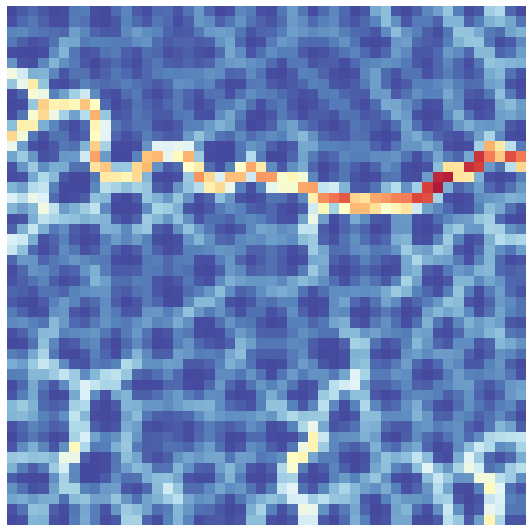

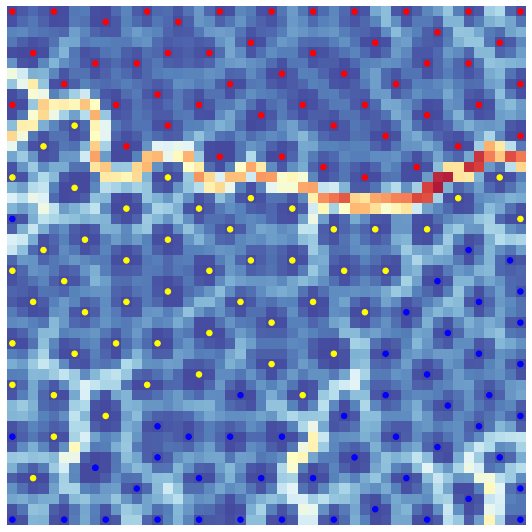

array([[0.00154279, 0.02797028, 0.05529294, ..., 0.29383454, 0.05263419,
        0.00745858],
       [0.01210197, 0.05624121, 0.08310182, ..., 0.22329159, 0.16757795,
        0.07760083],
       [0.10625761, 0.11311965, 0.08740971, ..., 0.06583321, 0.164164  ,
        0.19567335],
       ...,
       [0.16875981, 0.18523807, 0.15066023, ..., 0.38116619, 0.09801478,
        0.080479  ],
       [0.01813078, 0.07486225, 0.23035508, ..., 0.37089212, 0.08471598,
        0.08012094],
       [0.00062547, 0.01798065, 0.2009474 , ..., 0.28536704, 0.02150696,
        0.02269221]])

In [0]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
umat = u.build_u_matrix(som_iris, distance=1, row_normalized=False)
sm.show(umat,som_iris, show_data=False)
sm.show(umat,som_iris,colors=colors)


Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?

La matrix de distancia unificada es un recurso que permite visualizar la distancia entre las neuronas. Utilizando colores según la distancia entre los pesos W comparando neuronas vecinas.

1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1

De la gráfica obtenica se tiene que se cuentan con 3 clusters, debido a que las regiones más oscuras dan información de separación entre clusters, demarcando así 3 regiones, siendo una de ellas facil de reconocer y una tercera región en la que no hay una división tan evidente pero se puede observar una diferencia en que hay un área más clara y otra más oscura.

Ejecute la siguiente instrucción:

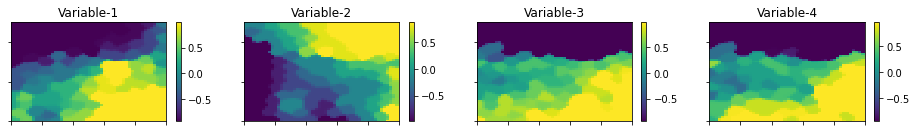

In [0]:
from sompy.visualization.mapview import View2D
view2D  = View2D(100,100,"rand data",text_size=10)
view2D.show(som_iris, col_sz=4, which_dim="all", denormalize=True)

Responda:

1.3 ¿Qué se está gráficando en las figuras? 

La activación de las regiones para cada una de las variables de entrada evaluadas o componentes.

1.4 ¿Qué utilidad tienen las gráficas anteriores?

Permite encontrar el número de clusters presentes sin ninguna información previa analizando la información que proporciona la gráfica, ademas de realizar una analisís de que varibles están correlacionadas.

1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?

La varables 3 y 4

In [0]:
codebook = som_iris._normalizer.denormalize_by(som_iris.data_raw, som_iris.codebook.matrix)
mp = codebook.reshape(som_iris.codebook.mapsize[0],som_iris.codebook.mapsize[1],codebook.shape[1])
mp.shape

(50, 50, 4)

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [0]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X_digits = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color_digits = []
for i in range(len(Y)):
    if Y[i] == 0:
        color_digits.append('red')
    elif Y[i] == 1:
        color_digits.append('blue')
    elif Y[i] == 2:
        color_digits.append('green')
    elif Y[i] == 3:
        color_digits.append('yellow')

In [0]:
random.seed(19680801)
scaler = StandardScaler()
Xn_dig = scaler.fit_transform(X_digits);

map_size = [50,50]

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas 50x50.

In [0]:
mapsize = [50,50]
component_names = ['0','1','2', '3']
som_digits = sompy.SOMFactory.build(Xn_dig, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
som_digits.train(n_job=1, verbose='info', maxtrainlen=100) 

 Training...
 pca_linear_initialization took: 0.043000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.315000, quantization error: 6.005682

 epoch: 2 ---> elapsed time:  0.331000, quantization error: 5.844588

 epoch: 3 ---> elapsed time:  0.324000, quantization error: 5.632467

 epoch: 4 ---> elapsed time:  0.319000, quantization error: 5.528802

 epoch: 5 ---> elapsed time:  0.325000, quantization error: 5.457209

 epoch: 6 ---> elapsed time:  0.317000, quantization error: 5.405375

 epoch: 7 ---> elapsed time:  0.314000, quantization error: 5.375174

 epoch: 8 ---> elapsed time:  0.320000, quantization error: 5.352972

 epoch: 9 ---> elapsed time:  0.320000, quantization error: 5.332714

 epoch: 10 ---> elapsed time:  0.318000, quantization error: 5.315238

 epoch: 11 ---> elapsed time:  0.312000, quantization error: 5.300654

 epoch: 12 ---> elapsed time:  0.327000, quantization error: 5.288338

 epoch: 13 -

Una vez entrenado el SOM, ejecute la siguiente celda

(50, 50)


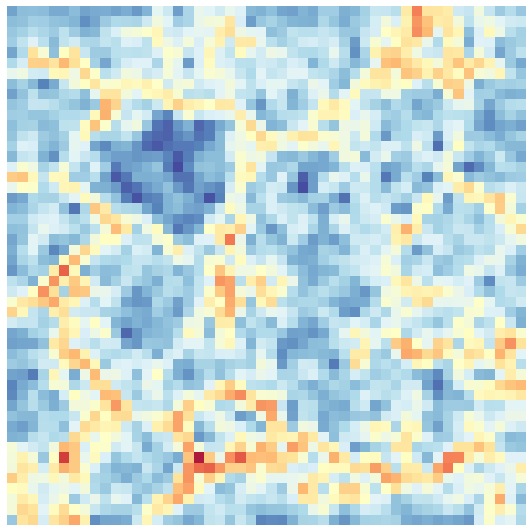

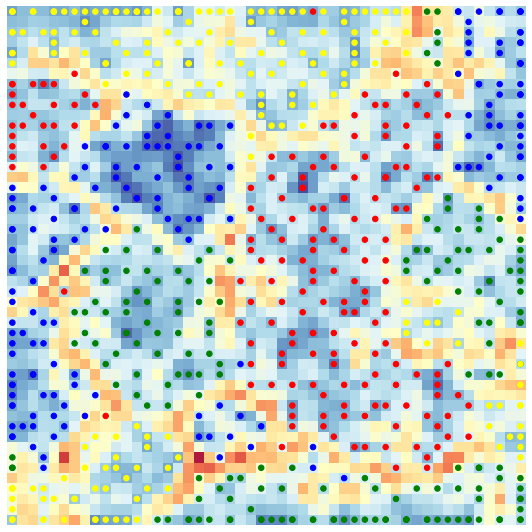

array([[0.98746092, 1.13994997, 1.15310223, ..., 1.21888866, 1.34077518,
        1.20066431],
       [1.14233845, 1.1589831 , 1.24553117, ..., 1.58713264, 1.49252693,
        1.4653865 ],
       [1.20259617, 1.25581723, 1.36310139, ..., 1.68124373, 1.36263707,
        1.26083338],
       ...,
       [1.72745496, 2.00847034, 1.90793145, ..., 2.38225774, 1.56275566,
        1.11560275],
       [1.73814651, 2.14270796, 2.08338603, ..., 1.9824676 , 1.777427  ,
        1.34047978],
       [1.2028245 , 2.07654532, 2.14849337, ..., 1.54571256, 1.60448179,
        1.30766927]])

In [0]:
u_digits = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

umat_digits = u_digits.build_u_matrix(som_digits, distance=1, row_normalized=False)
print(umat_digits.shape)
sm.show(umat_digits,som_digits, show_data=False)
sm.show(umat_digits,som_digits,colors=color_digits)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?

Ademas de que hay un mayor número de clusters se puede observar que dentro de cada cluster se presenta una menor cercanía entre las neuronas proximas en comparación con la matrix anterior, esto se puede observar en que las regiones tienen un color más claro. 

2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

Las clases no se encuentrán agrupadas en un solo cluster así que en este caso el número de clusters no corresponde al número de clases.

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

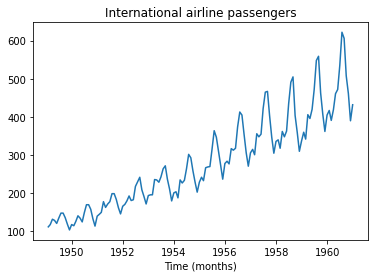

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab.
Use la instrucción:
```!pip3 install neurolab
```
La documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

In [0]:
!pip3 install neurolab

     |████████████████████████████████| 655kB 2.6MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-cp36-none-any.whl size=22180 sha256=6836c38017683c3de56553d7fda8c7727352ae7b5d596d437914a6c42725315a
  Stored in directory: /root/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/neurolab-0.3.5.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [96]:
import neurolab as nl
from sklearn.preprocessing import MinMaxScaler


# reshape into X=t-look_back+1:t and Y=t+1

def neuronalElman(lb, cantNeuronas):

  random.seed(19680801)
  dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
  # normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  # split into train and test sets
  train_size = int(len(dataset) * 0.7)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  random.seed(19680801)

  # normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  # split into train and test sets
  train_size = int(len(dataset) * 0.7)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  print('look_back', lb)
  print('neuronas', cantNeuronas)    
   
  look_back = lb # Retardos de tiempo por muestra
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  #Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
  layers = []
  for i in range(look_back):
      layers.append([0, 1])

  # Crear la red e inicializar los pesos. 
  cantNeuronas = cantNeuronas
  net = nl.net.newelm(layers, [cantNeuronas, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
  net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
  net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
  net.init()

  target = trainY.reshape(trainX.shape[0],1);

  # Entrenar la red con los datos de entrenamiento
  error = net.train(trainX, target, epochs=1000, show=100, goal=0.00001)

  # Evaluar la red con los datos de test
  output = net.sim(testX)

  # Calculo de error
  return MAPE(output,testY)

Error = neuronalElman(2,5)
print('MAPE = ' + str(np.mean(Error)))

look_back 2
neuronas 5
Epoch: 100; Error: 0.019199508254066033;
Epoch: 200; Error: 0.006073572205541273;
Epoch: 300; Error: 0.0024875127269872372;
Epoch: 400; Error: 0.0020007375909458424;
Epoch: 500; Error: 0.0018995873855588243;
Epoch: 600; Error: 0.001872280605495596;
Epoch: 700; Error: 0.0018717673315060241;
Epoch: 800; Error: 0.0019756335596946978;
Epoch: 900; Error: 0.001902412317299774;
Epoch: 1000; Error: 0.0018656854806664883;
The maximum number of train epochs is reached
MAPE = 0.12145274882804885


3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

(42, 1) (44, 1)


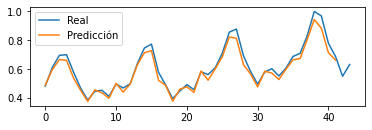

In [54]:

print(output.shape, test.shape)
# Gráfica
plt.subplot(2,1,2)
plt.plot(test.reshape(test.shape[0]))
plt.plot(output.reshape(output.shape[0]))
plt.legend(['Real', 'Predicción'])
plt.show()

In [60]:
pip install qgrid

     |████████████████████████████████| 890kB 2.8MB/s 
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761259 sha256=72e11b6722088f76061bd47a64a9ba553bb4f0c81aab951fafbf2ef54971eb2d
  Stored in directory: /root/.cache/pip/wheels/51/60/bf/bf05b881c1869ec4e1274a6059f663af1148925c5de1a688d8
Successfully built qgrid


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/qgrid-1.3.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [99]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})

df_types["MAPE"] = ""
df_types["MAPE"][0] = "0.124732765"
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget


mape = np.ones(24)
i = 1
k=0
while i <= 4:
    j = 0
    while j<=5:
        err = neuronalElman(i, (j+1)*5) 
        mp = str(np.mean(err))
        #print(numero_arboles[i], j*5)
        print('Mape: ', mp)
        mape[k] = mp
        #df_types["Eficiencia en validacion"][k]= ef
        #df_types["Intervalo de confianza"][k] = co
        j = j + 1
        k = k + 1
        
    i = i + 1    
print(mape)    
df_types["MAPE"]= mape
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


look_back 1
neuronas 5
Epoch: 100; Error: 0.018288540656380397;
Epoch: 200; Error: 0.0024964411953478163;
Epoch: 300; Error: 0.0020820334814228153;
Epoch: 400; Error: 0.001930556768793353;
Epoch: 500; Error: 0.0019225934979861348;
Epoch: 600; Error: 0.0019158144400718503;
Epoch: 700; Error: 0.0019195792919242541;
Epoch: 800; Error: 0.0018952435289607923;
Epoch: 900; Error: 0.002090491939305284;
Epoch: 1000; Error: 0.0018801243847247878;
The maximum number of train epochs is reached
Mape:  0.12473276507035648
look_back 1
neuronas 10
Epoch: 100; Error: 0.01826861312510988;
Epoch: 200; Error: 0.0021689060049152453;
Epoch: 300; Error: 0.0019420138335285676;
Epoch: 400; Error: 0.0020069883031246924;
Epoch: 500; Error: 0.0019172376575234786;
Epoch: 600; Error: 0.0019057218336536721;
Epoch: 700; Error: 0.002001203236648856;
Epoch: 800; Error: 0.0019018304746997133;
Epoch: 900; Error: 0.0018773480404277712;
Epoch: 1000; Error: 0.0018943906077310045;
The maximum number of train epochs is reache

[0.12473277 0.12387435 0.12494025 0.12631467 0.12599663 0.1260971
 0.12145275 0.12696882 0.11781182 0.11695319 0.11738794 0.12348624
 0.12105476 0.12096757 0.11407509 0.1129701  0.11449521 0.11674892
 0.12475672 0.12591998 0.1259343  0.13075812 0.12381853 0.12787069]


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [103]:
qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa          
1                              5                  0.124733
                               10                 0.123874
                               15                 0.124940
                               20                 0.126315
                               25                 0.125997
                               30                 0.126097
2                              5                  0.121453
                               10                 0.126969
                               15                 0.117812
                               20                 0.116953
                               25                 0.117388
                               30                 0.123486
3                              5                  0.121055
                               10                 0.120968
                               15                 0.114075
                               20                 0.112970
                               25                 0.114495
                               30                 0.116749
4                              5                  0.124757
                               10                 0.125920
                               15                 0.125934
                               20                 0.130758
                               25                 0.123819
                               30                 0.127871

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?

3 retardos de tiempo y 20 neuronas para un MAPE: 0.112970


3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

Al mirar los valores de los tiempos anteriores para predecir el siguiente valor, puede suceder que exista cierta periocidad que haga que se esten tomando valores para tiempos posteriores. 


## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.